In [2]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\RAM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)

In [6]:
import numpy as np
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

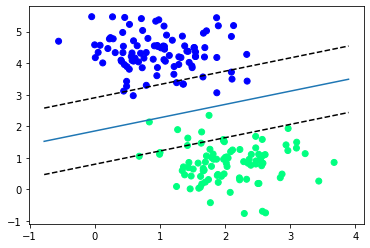

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [10]:
y_pred = svc.predict(X_test)

In [11]:
confusion_matrix(y_test,y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

In [12]:
svc.score(X_test,y_test)

1.0